# Setup Test Population

In [12]:
from src.controller.ga import GeneticAlgorithm, GAConfig
from src.model.molecule import Molecule
from src.model.population import Population
from src.model.fitness import stability_fitness

initial = [
    Molecule("[C][C]"),
    Molecule("[C][O]"),
    Molecule("[O][C]")
]

pop = Population(initial)

# Configure GA

In [13]:
cfg = GAConfig(
    mu=5,
    lam=5,
    mutation_rate=0.4,
    crossover_rate=0.9,
    tournament_k=2,
    random_seed=0
)

ga = GeneticAlgorithm(cfg, stability_fitness)

# Evolution and History

In [14]:
history = ga.evolve(pop, generations=100)
print("Evolution done!")

Generation  0
Generation  1
Generation  2
Generation  3
Generation  4
Generation  5
Generation  6
Generation  7
Generation  8


[17:12:55] UFFTYPER: Unrecognized atom type: B_1 (2)
[17:12:55] UFFTYPER: Unrecognized charge state for atom: 0


Generation  9
Generation  10
Generation  11
Generation  12
Generation  13
Generation  14
Generation  15
Generation  16
Generation  17
Generation  18


[17:12:56] UFFTYPER: Unrecognized charge state for atom: 3


Generation  19
Generation  20
Generation  21
Generation  22
Generation  23
Generation  24
Generation  25
Generation  26


[17:12:56] UFFTYPER: Unrecognized charge state for atom: 2
[17:12:56] UFFTYPER: Unrecognized atom type: S_1+6 (2)
[17:12:57] UFFTYPER: Unrecognized charge state for atom: 0
[17:12:57] UFFTYPER: Unrecognized atom type: B_ (1)


Generation  27
Generation  28
Generation  29
Generation  30
Generation  31


[17:12:57] UFFTYPER: Unrecognized charge state for atom: 3
[17:12:57] UFFTYPER: Unrecognized atom type: B_1 (5)


Generation  32
Generation  33
Generation  34
Generation  35
Generation  36
Generation  37
Generation  38
Generation  39
Generation  40


[17:12:57] UFFTYPER: Unrecognized charge state for atom: 0


Generation  41
Generation  42
Generation  43
Generation  44
Generation  45
Generation  46
Generation  47
Generation  48
Generation  49
Generation  50
Generation  51


[17:12:58] UFFTYPER: Warning: hybridization set to SP3 for atom 7
[17:12:58] UFFTYPER: Unrecognized charge state for atom: 7


Generation  52
Generation  53


[17:12:58] UFFTYPER: Warning: hybridization set to SP3 for atom 2


Generation  54
Generation  55
Generation  56
Generation  57
Generation  58
Generation  59
Generation  60
Generation  61


[17:12:59] UFFTYPER: Unrecognized atom type: B_ (1)
[17:12:59] UFFTYPER: Unrecognized atom type: S_1+4 (5)


Generation  62
Generation  63
Generation  64
Generation  65


[17:12:59] UFFTYPER: Warning: hybridization set to SP3 for atom 3
[17:12:59] UFFTYPER: Unrecognized charge state for atom: 3


Generation  66
Generation  67
Generation  68
Generation  69
Generation  70
Generation  71
Generation  72
Generation  73
Generation  74
Generation  75
Generation  76
Generation  77
Generation  78


[17:13:02] UFFTYPER: Unrecognized atom type: B_ (6)


Generation  79
Generation  80
Generation  81
Generation  82
Generation  83
Generation  84
Generation  85


[17:13:03] UFFTYPER: Warning: hybridization set to SP3 for atom 4


Generation  86


[17:13:04] UFFTYPER: Warning: hybridization set to SP3 for atom 4


Generation  87
Generation  88
Generation  89
Generation  90
Generation  91


[17:13:04] UFFTYPER: Unrecognized atom type: B_ (1)


Generation  92
Generation  93
Generation  94
Generation  95
Generation  96


[17:13:05] UFFTYPER: Warning: hybridization set to SP3 for atom 8
[17:13:05] UFFTYPER: Unrecognized atom type: B_ (0)


Generation  97
Generation  98


[17:13:05] UFFTYPER: Unrecognized atom type: S_1+4 (2)
[17:13:05] UFFTYPER: Unrecognized atom type: S_1+4 (2)


Generation  99
Evolution done!


# Visualize

Generation 0


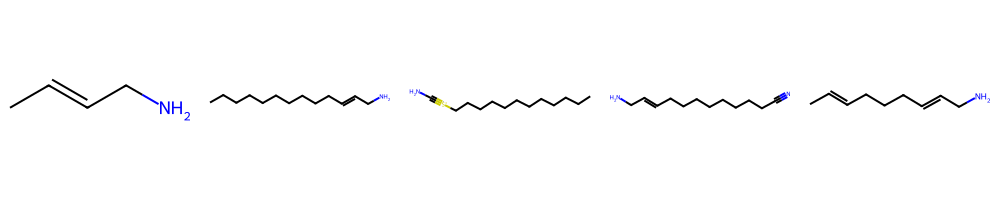

Generation 1


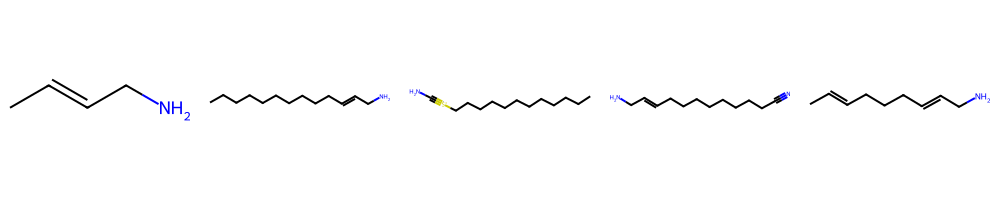

Generation 2


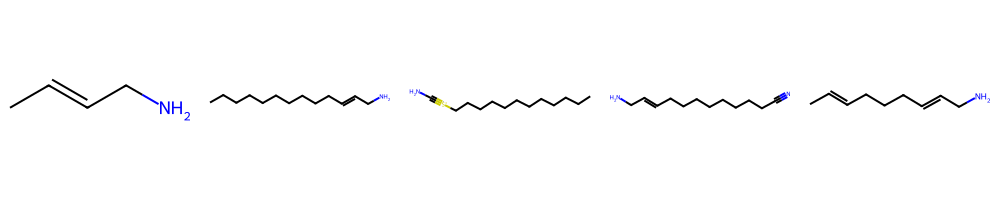

Generation 3


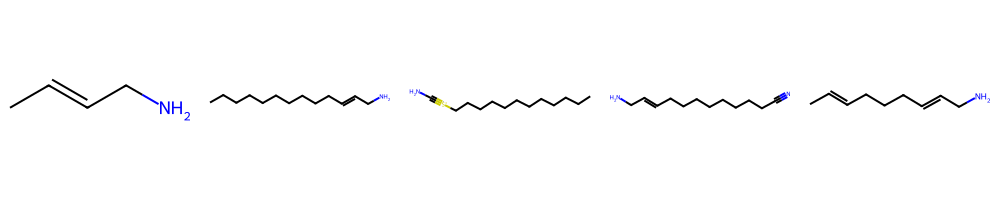

Generation 4


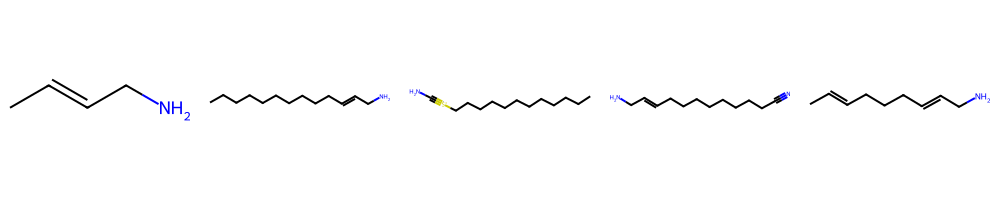

Generation 5


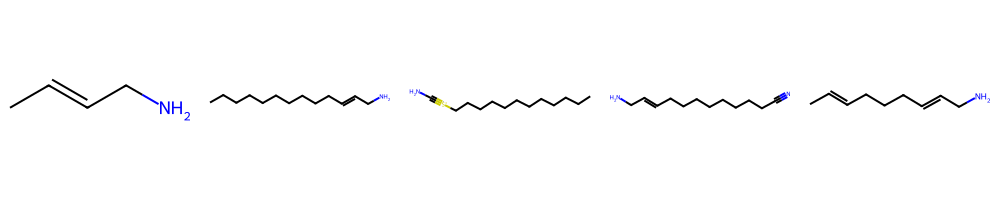

Generation 6


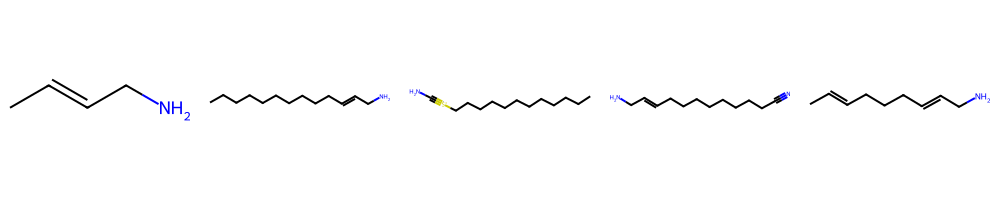

Generation 7


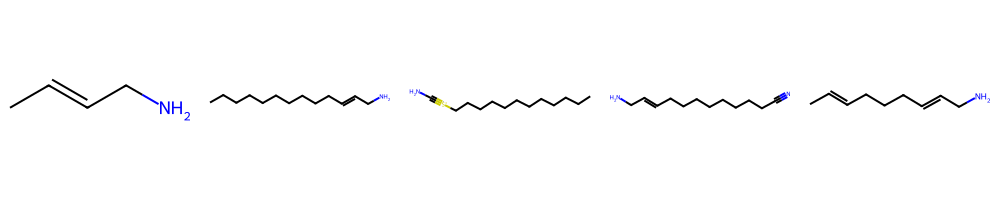

Generation 8


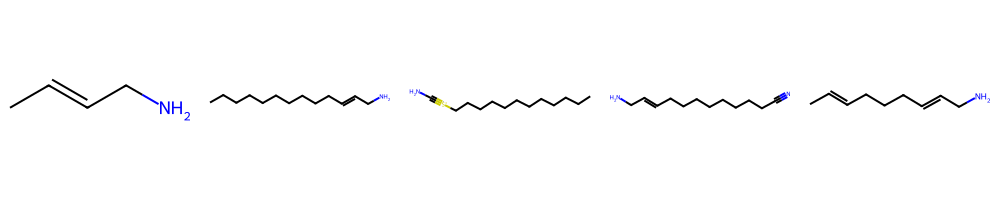

Generation 9


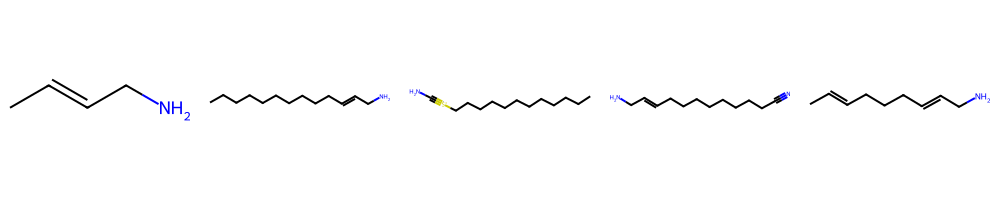

Generation 10


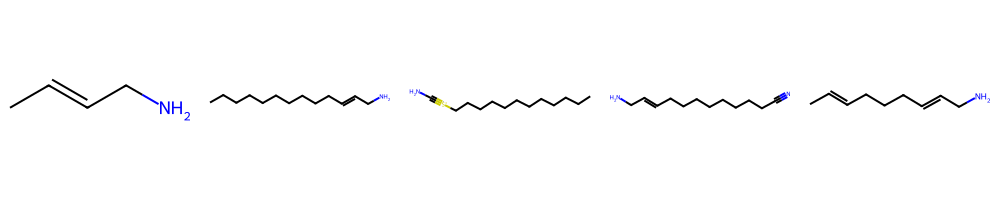

Generation 11


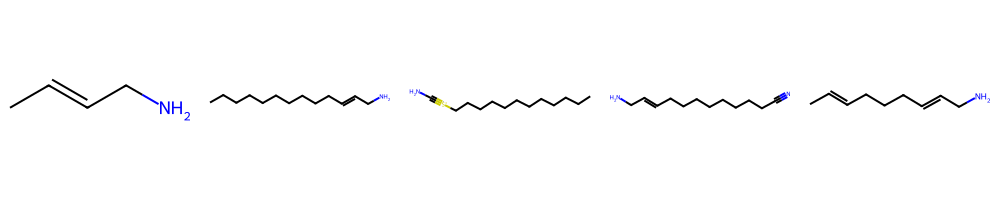

Generation 12


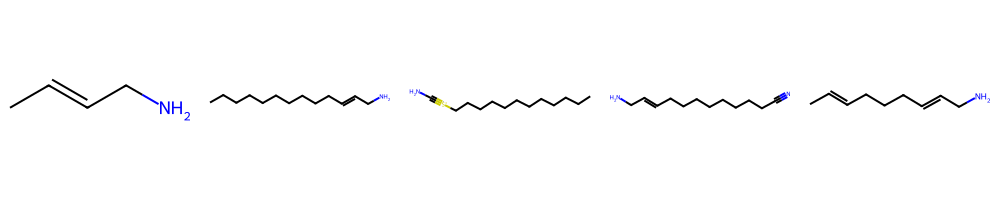

Generation 13


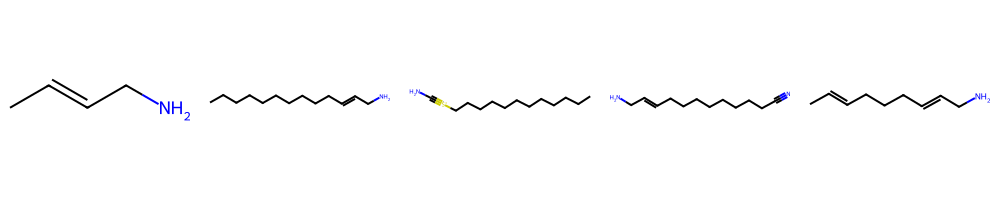

Generation 14


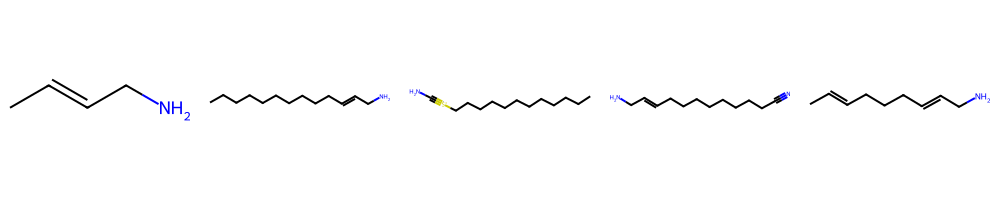

Generation 15


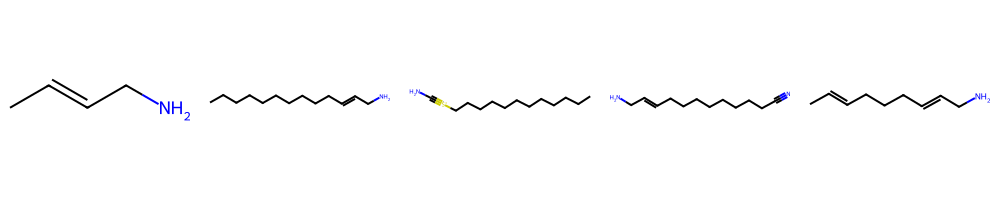

Generation 16


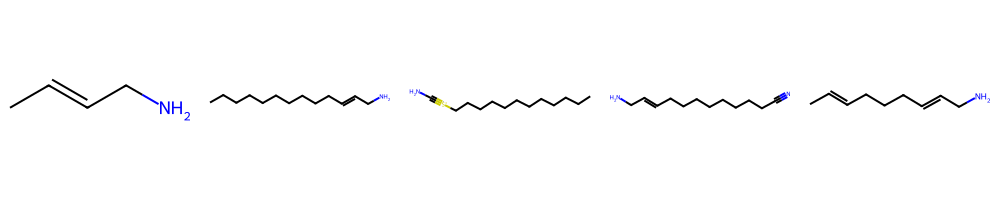

Generation 17


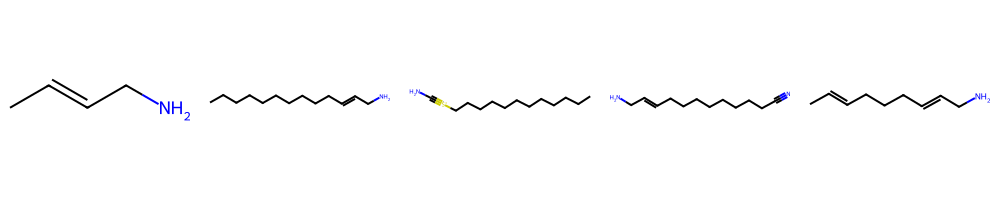

Generation 18


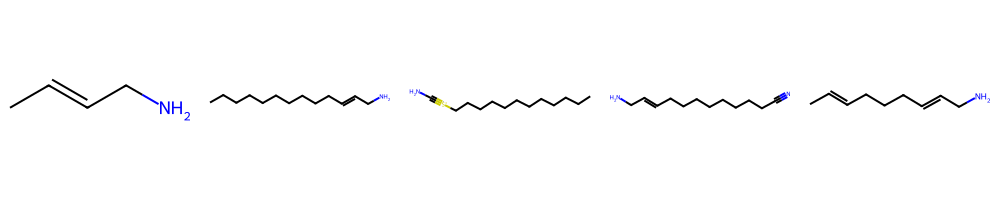

Generation 19


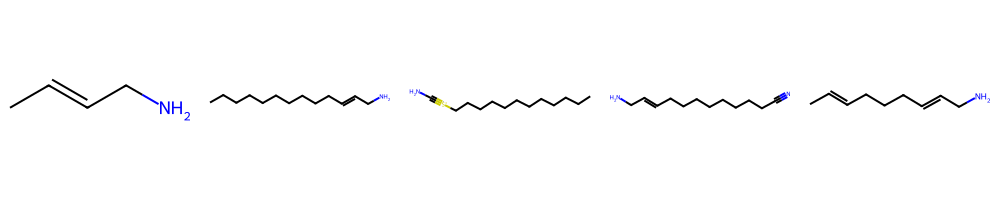

Generation 20


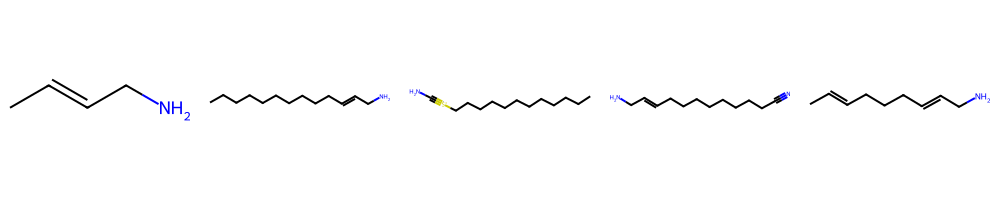

Generation 21


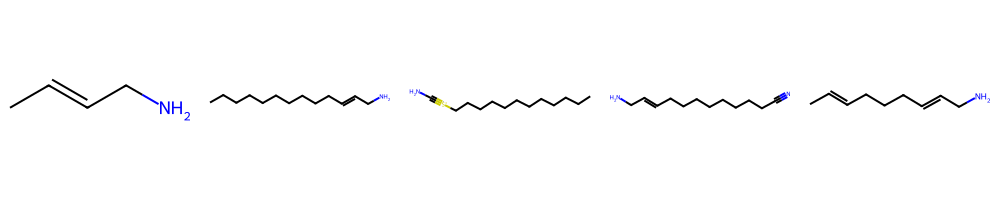

Generation 22


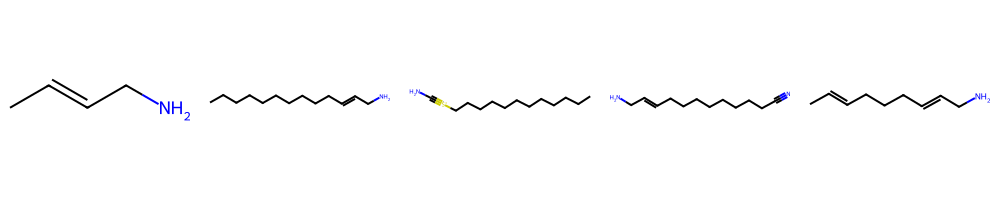

Generation 23


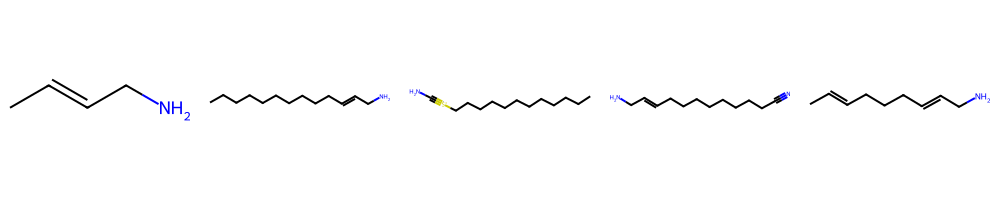

Generation 24


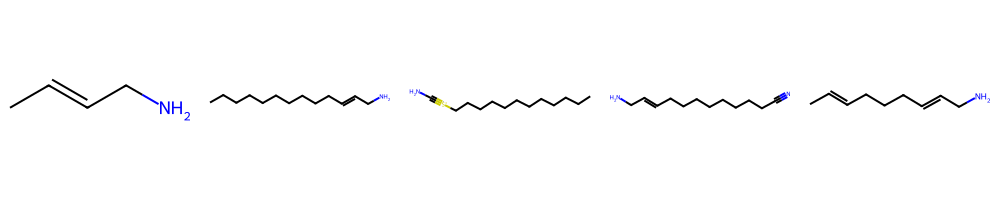

Generation 25


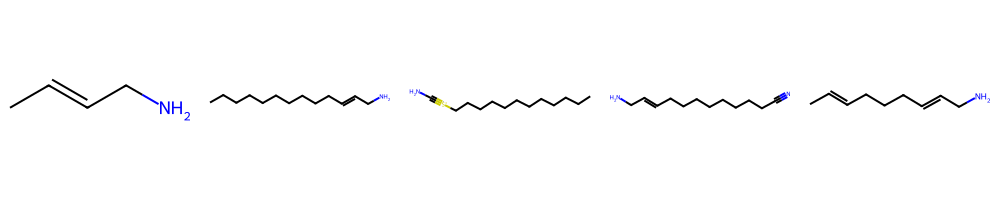

Generation 26


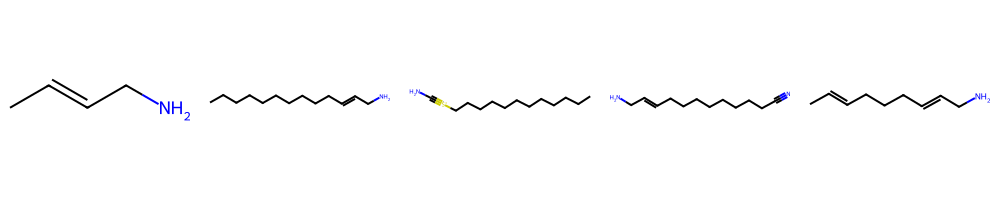

Generation 27


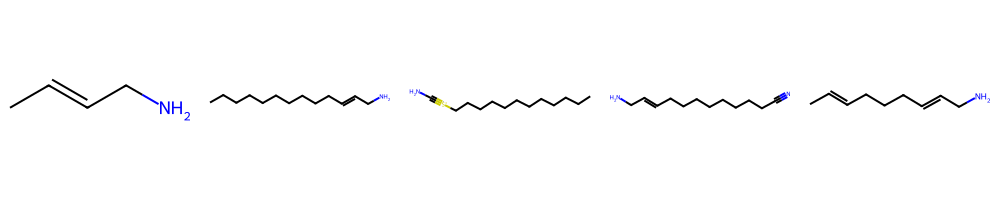

Generation 28


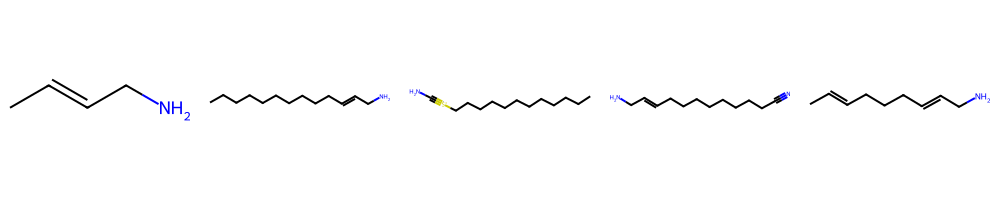

Generation 29


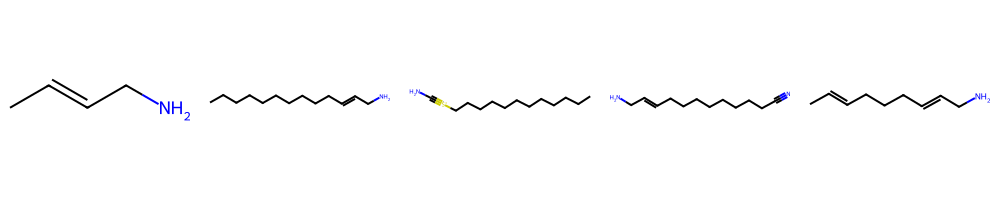

Generation 30


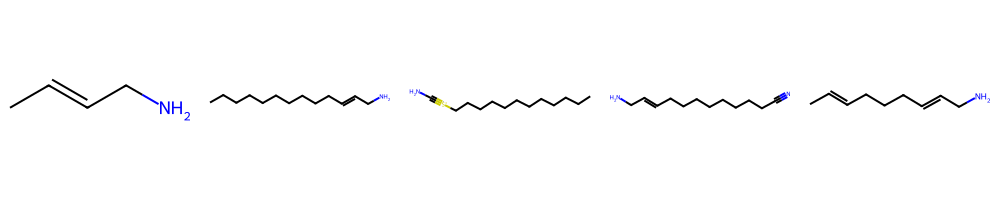

Generation 31


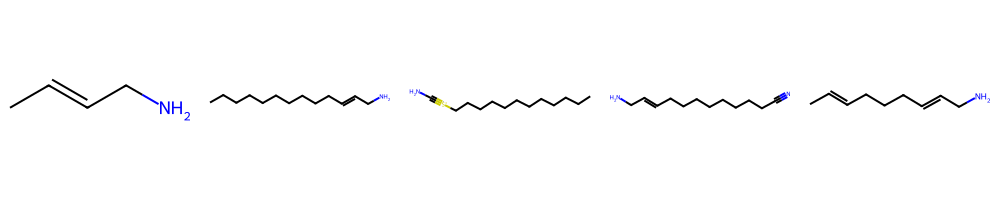

Generation 32


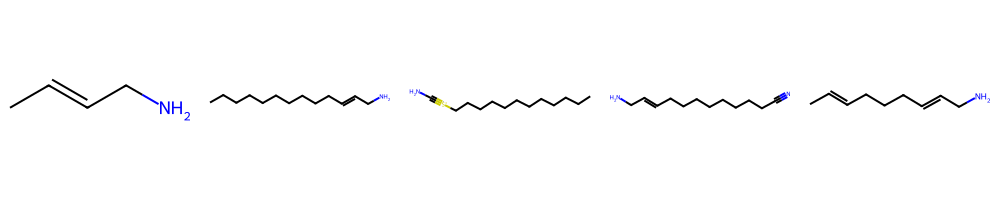

Generation 33


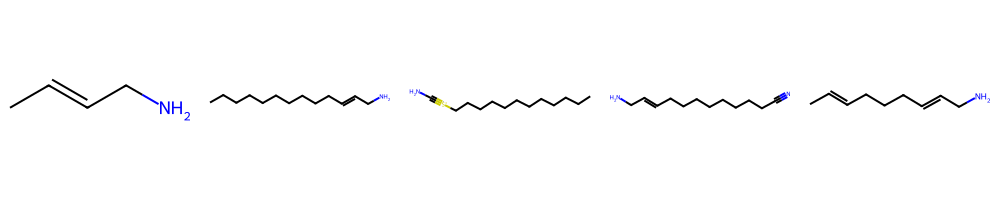

Generation 34


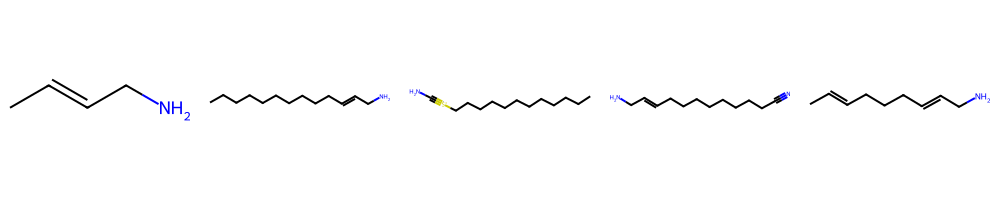

Generation 35


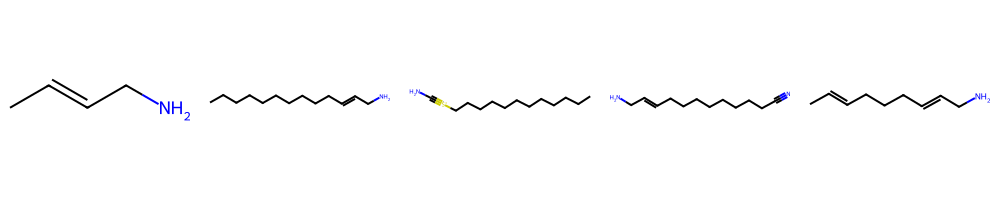

Generation 36


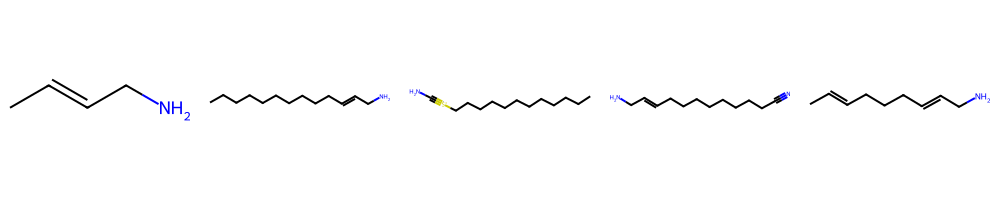

Generation 37


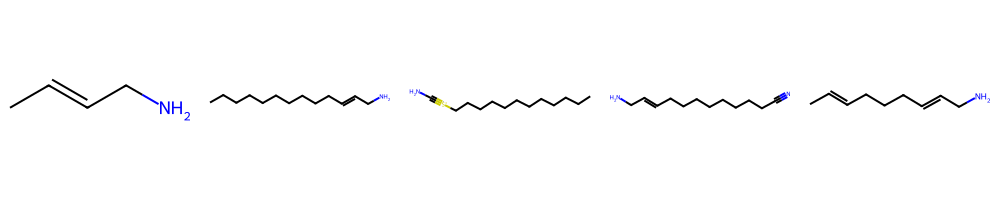

Generation 38


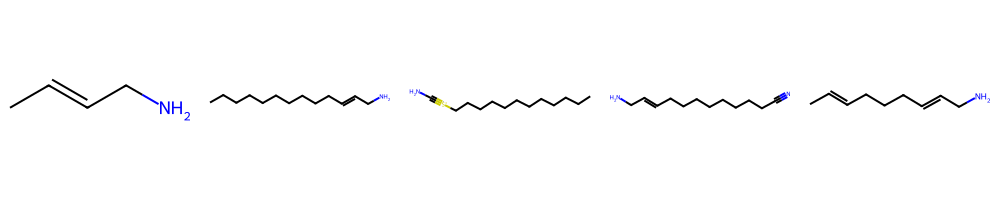

Generation 39


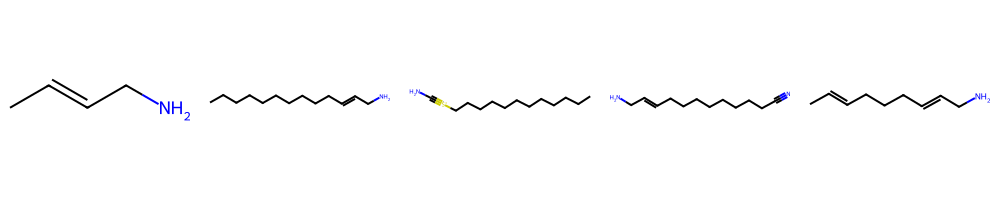

Generation 40


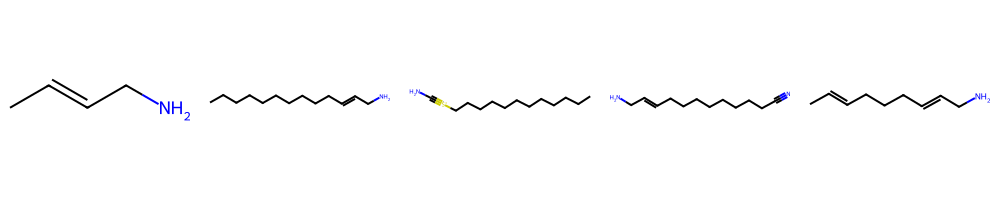

Generation 41


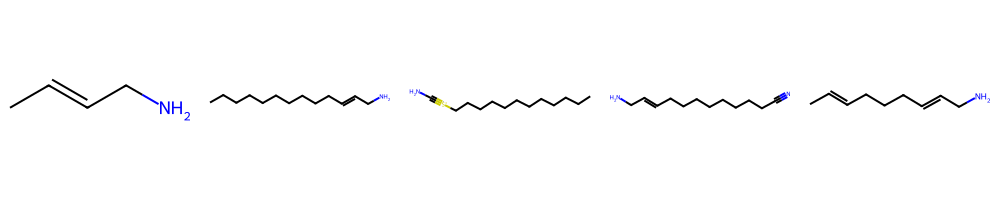

Generation 42


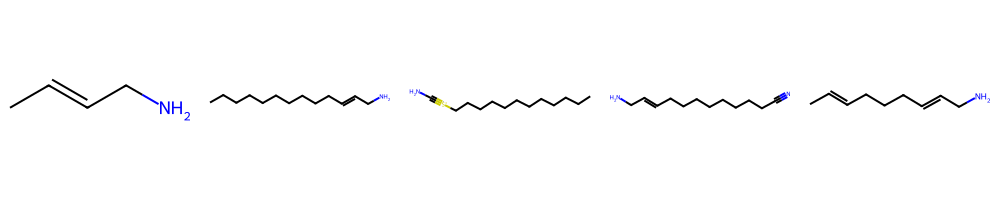

Generation 43


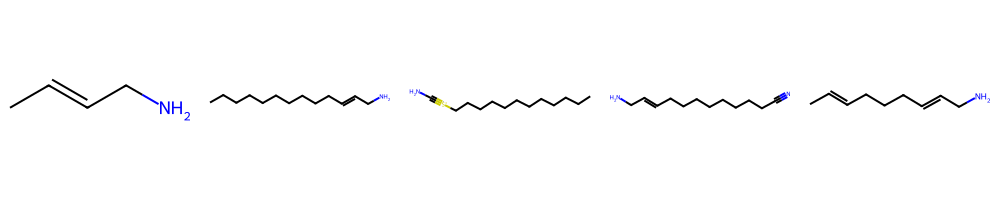

Generation 44


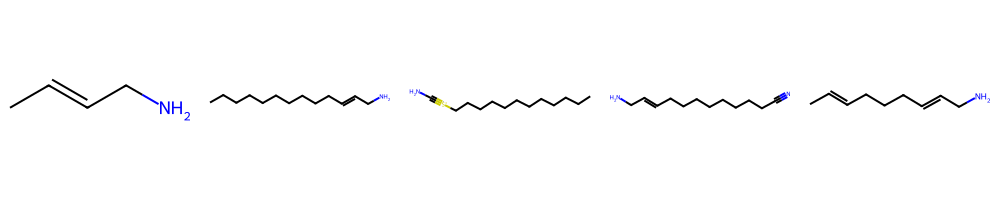

Generation 45


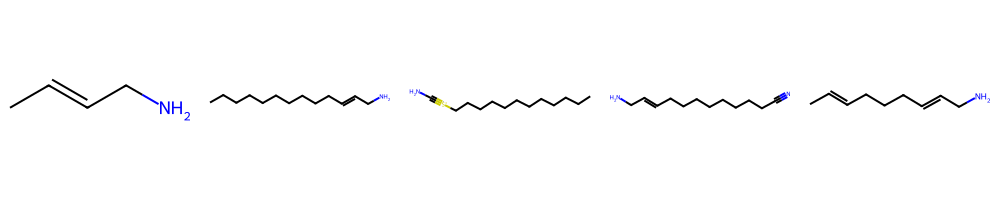

Generation 46


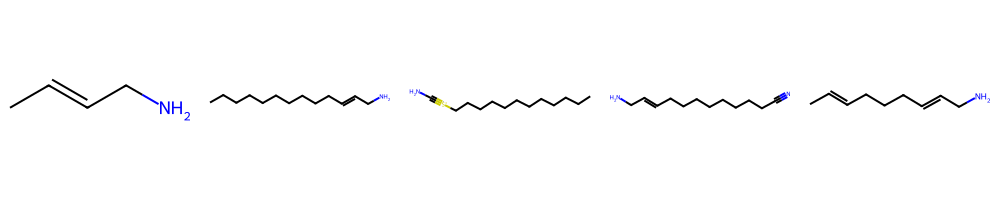

Generation 47


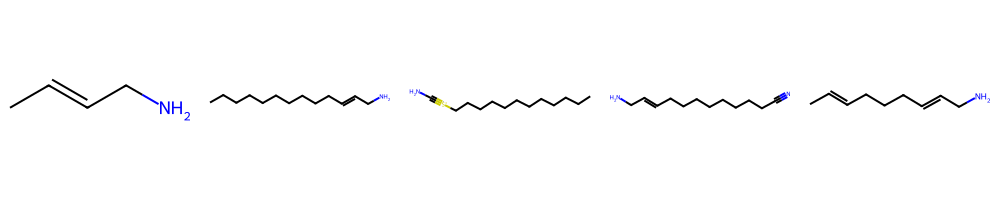

Generation 48


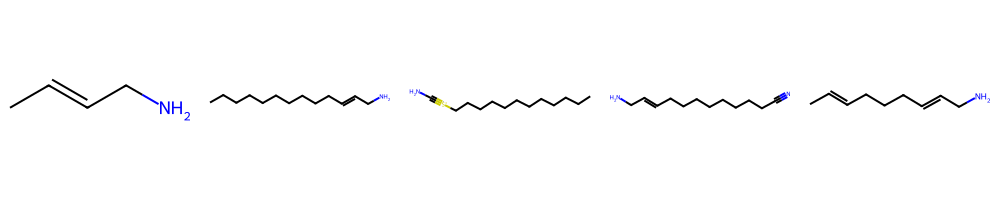

Generation 49


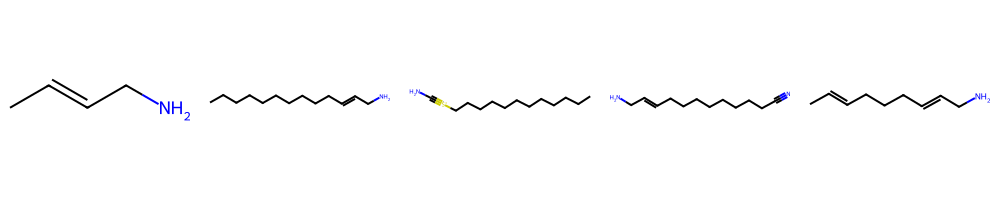

Generation 50


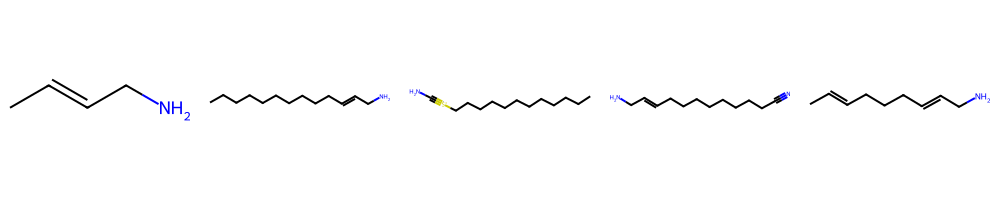

Generation 51


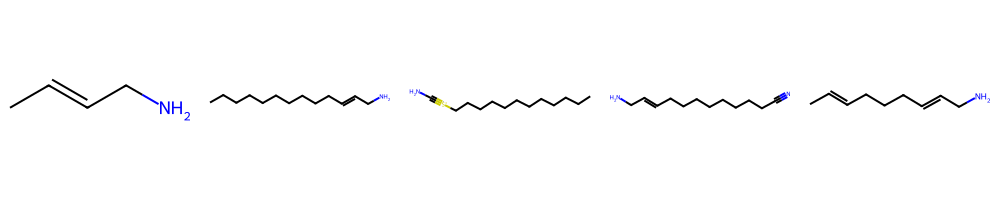

Generation 52


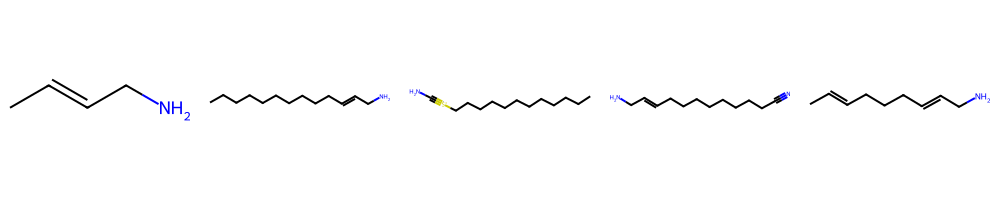

Generation 53


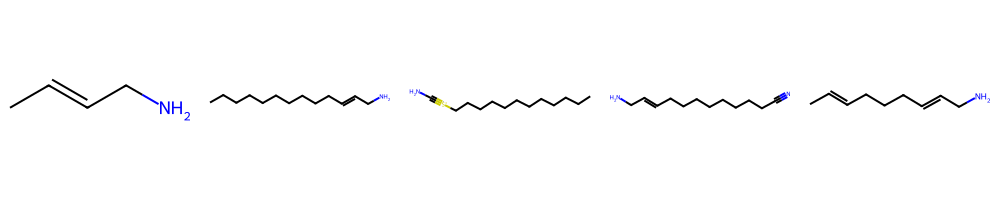

Generation 54


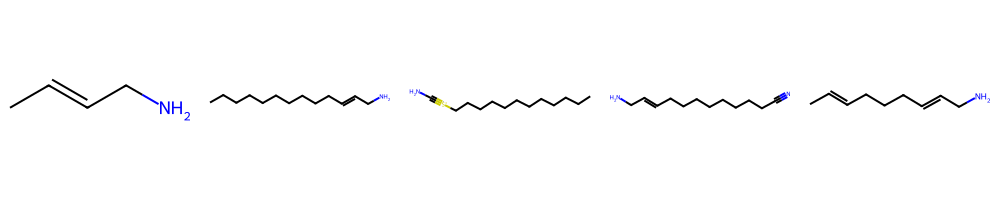

Generation 55


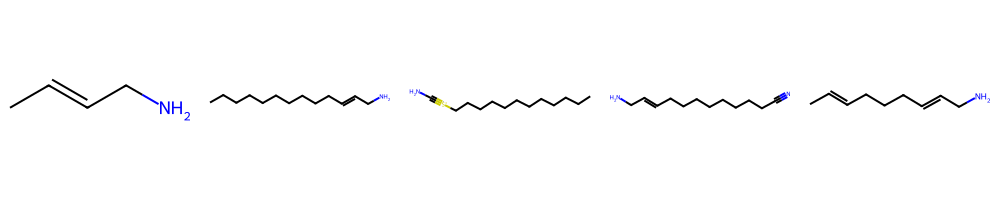

Generation 56


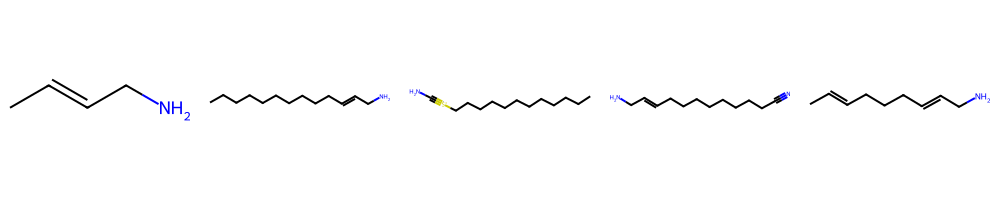

Generation 57


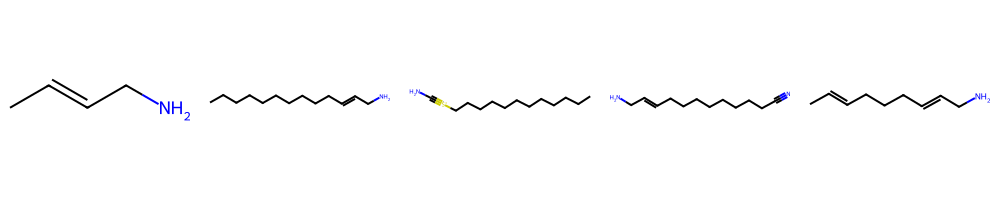

Generation 58


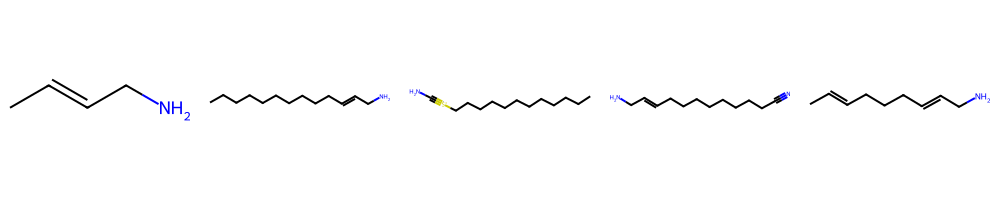

Generation 59


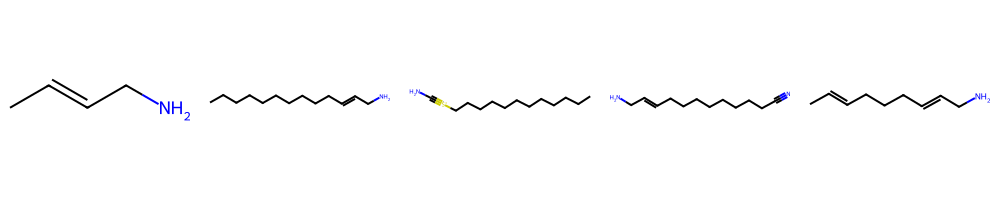

Generation 60


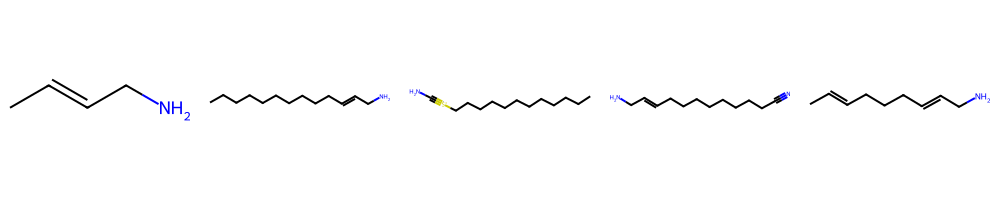

Generation 61


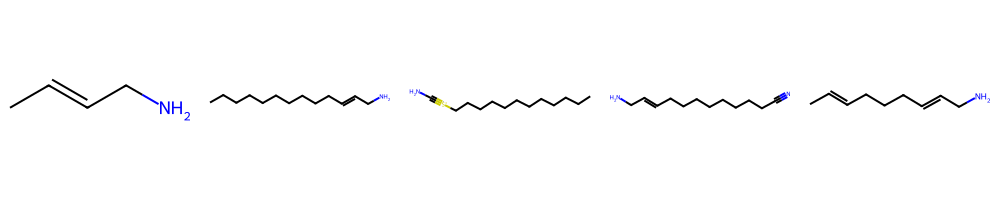

Generation 62


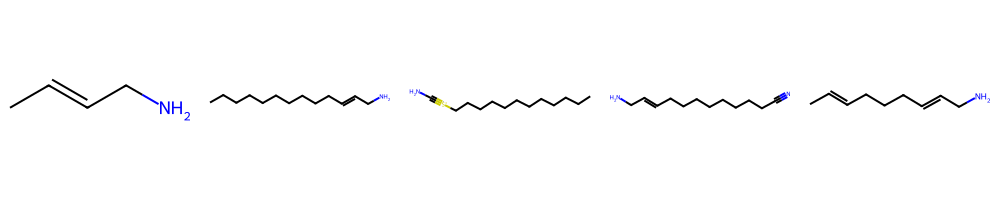

Generation 63


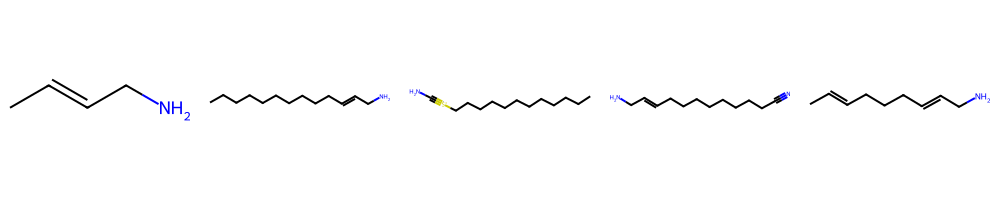

Generation 64


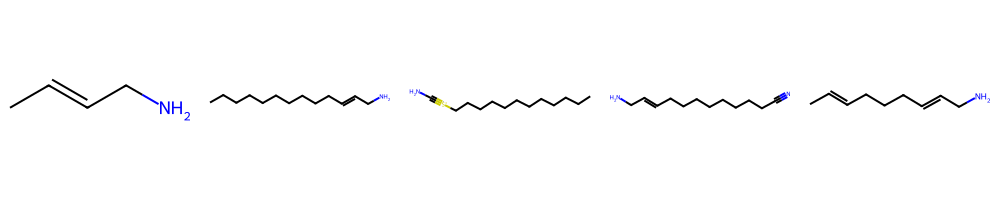

Generation 65


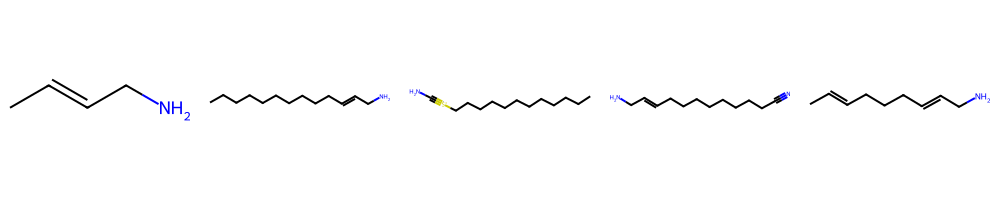

Generation 66


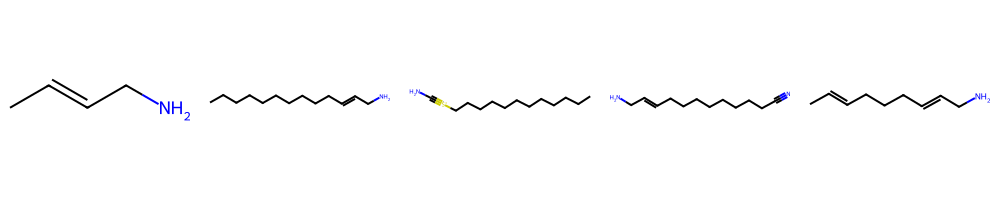

Generation 67


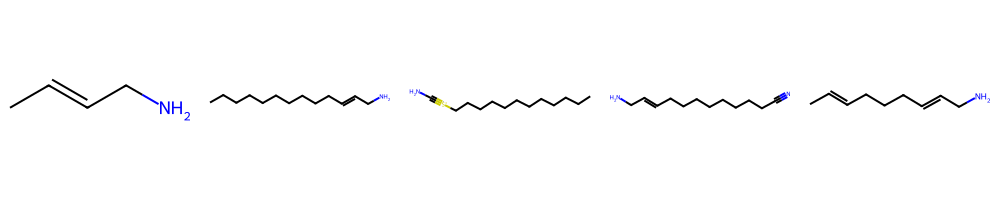

Generation 68


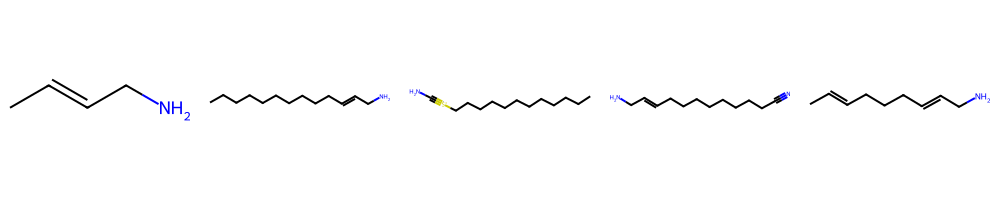

Generation 69


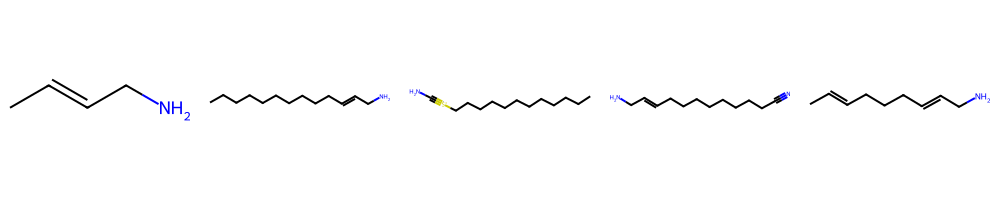

Generation 70


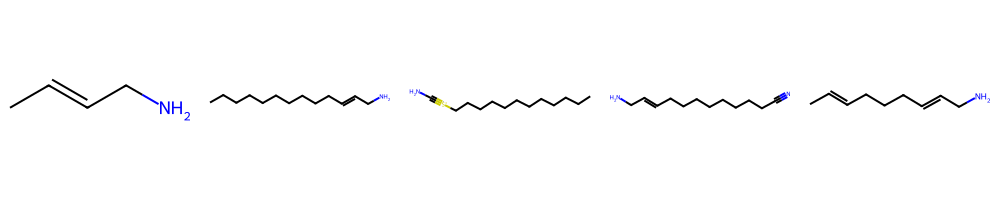

Generation 71


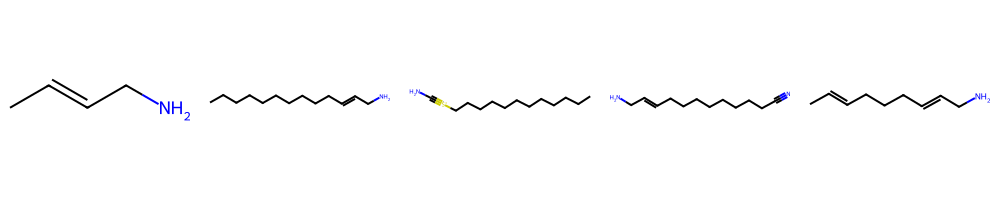

Generation 72


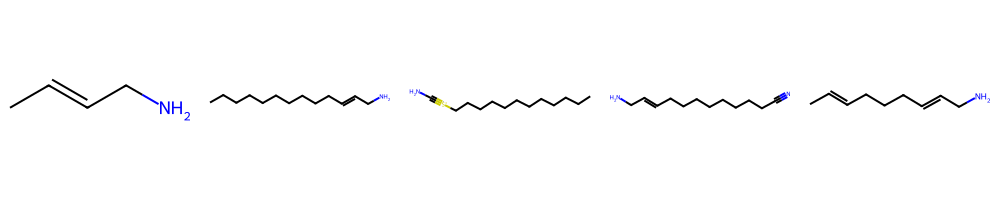

Generation 73


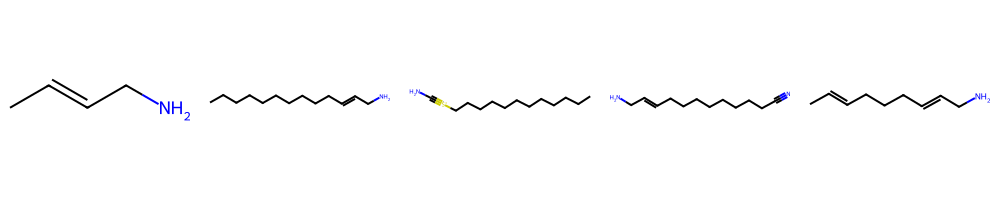

Generation 74


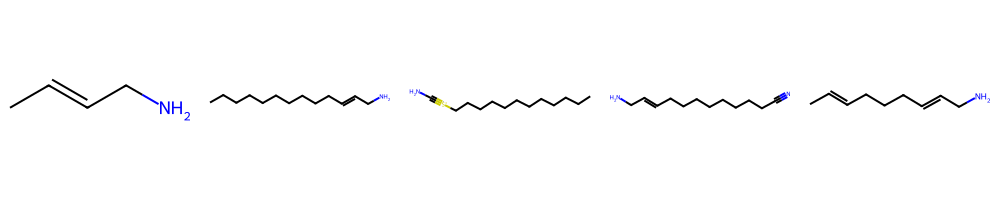

Generation 75


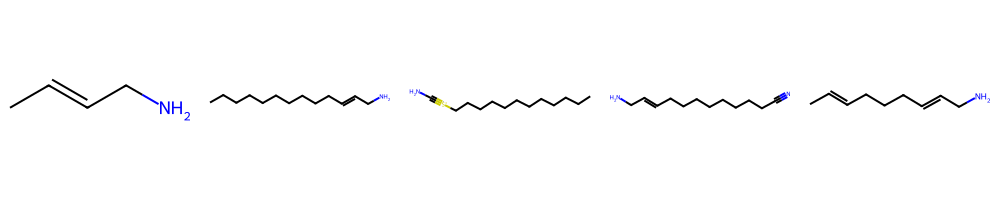

Generation 76


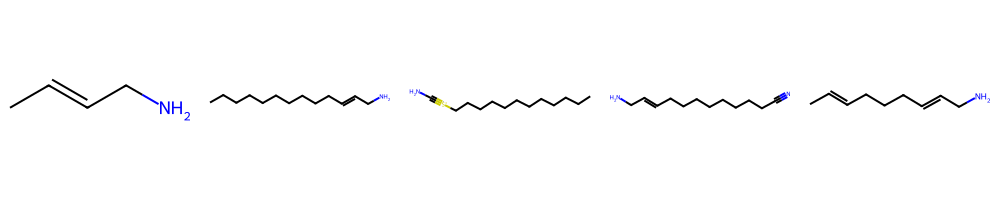

Generation 77


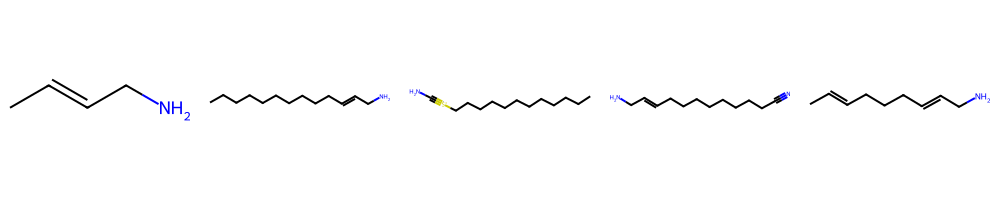

Generation 78


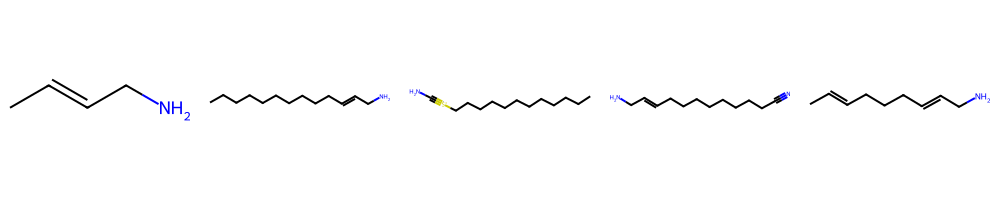

Generation 79


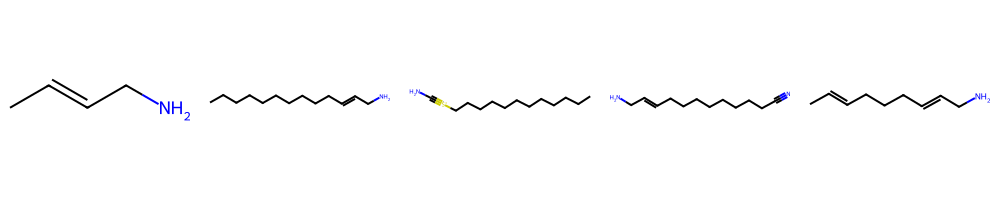

Generation 80


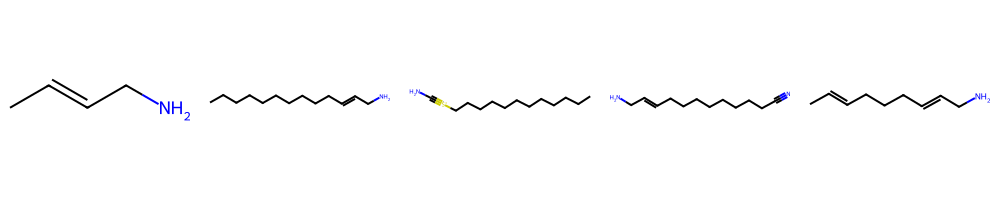

Generation 81


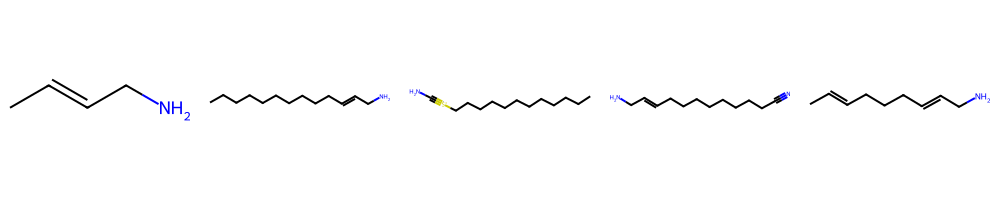

Generation 82


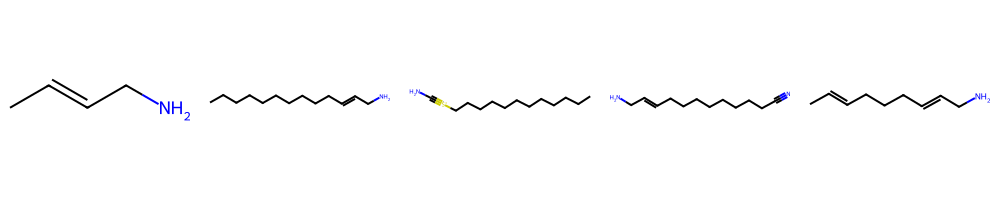

Generation 83


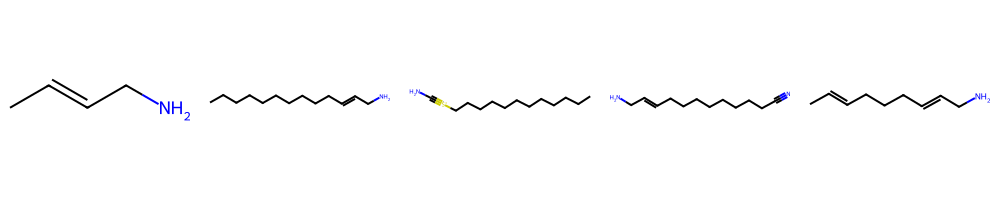

Generation 84


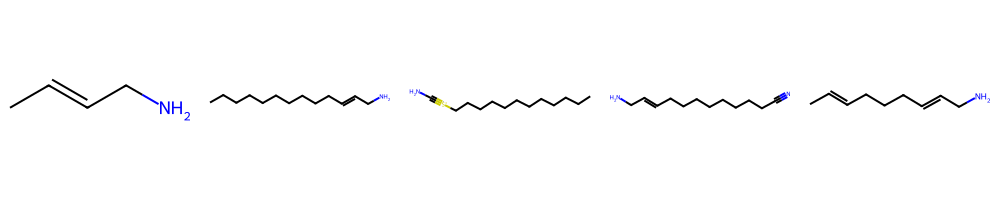

Generation 85


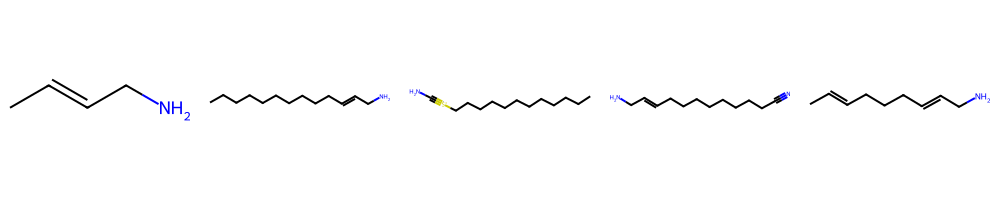

Generation 86


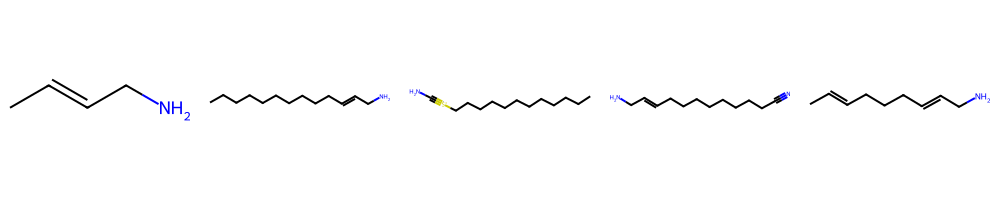

Generation 87


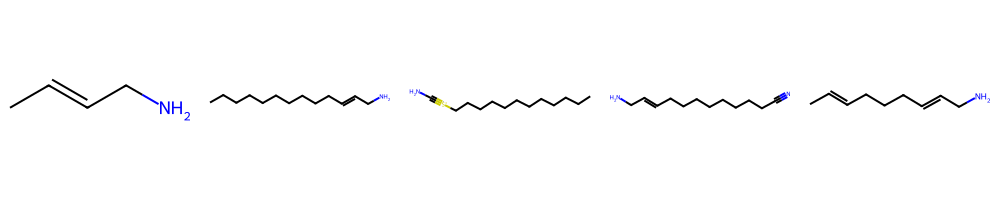

Generation 88


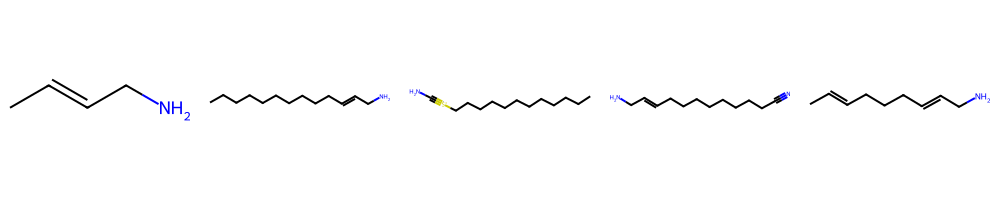

Generation 89


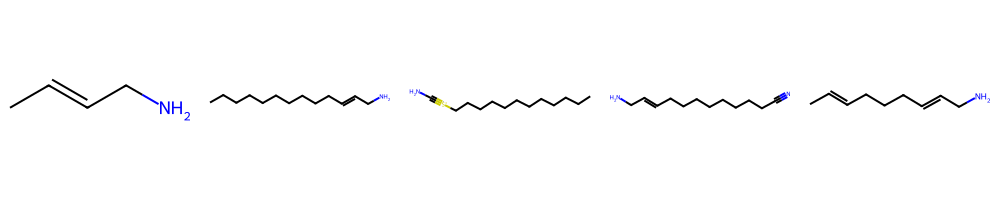

Generation 90


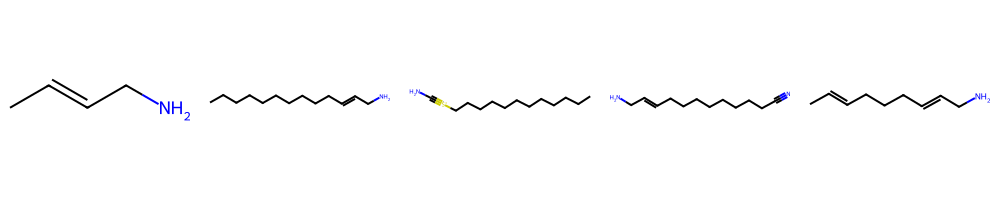

Generation 91


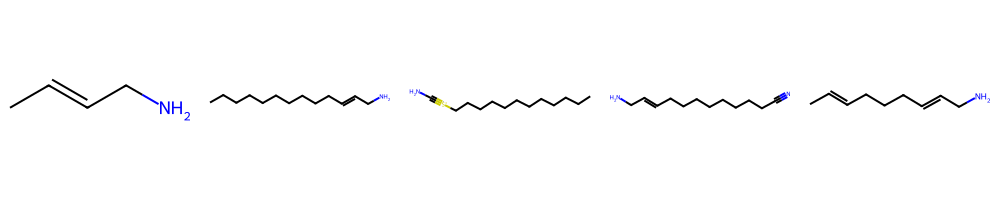

Generation 92


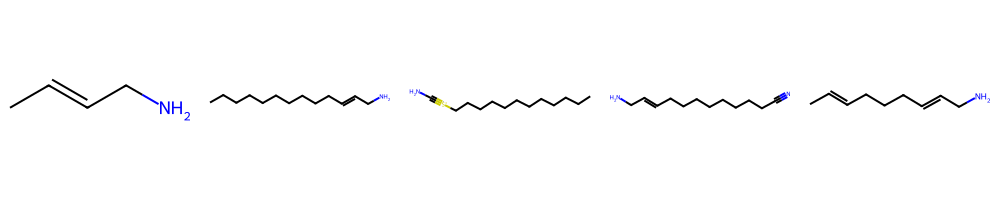

Generation 93


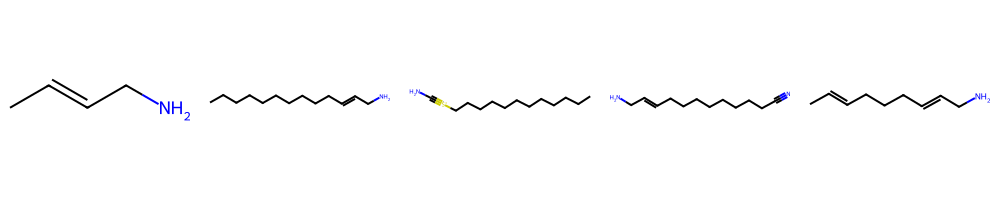

Generation 94


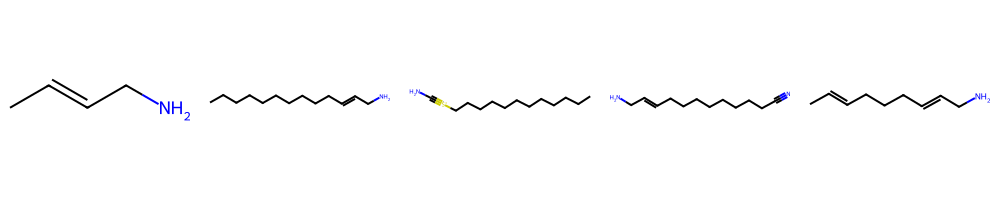

Generation 95


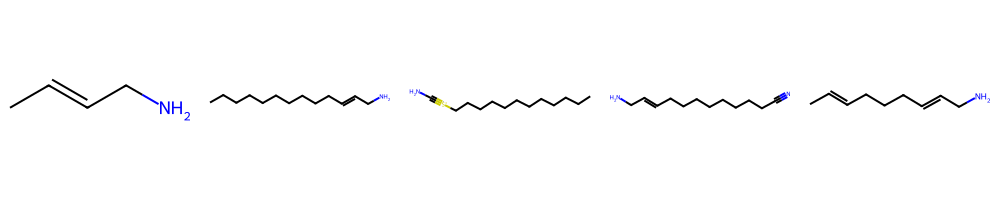

Generation 96


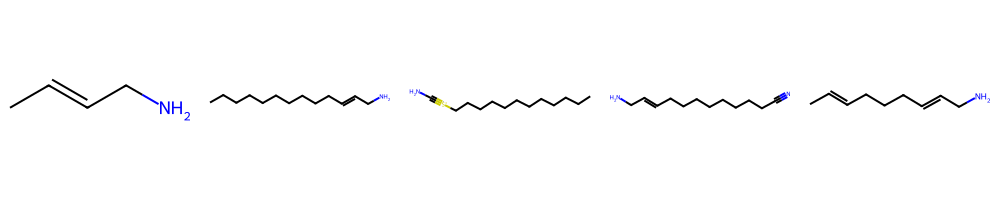

Generation 97


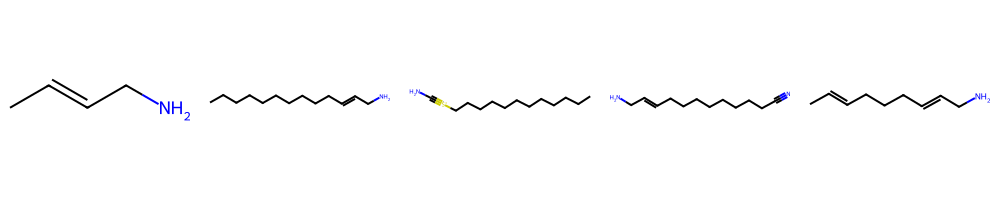

Generation 98


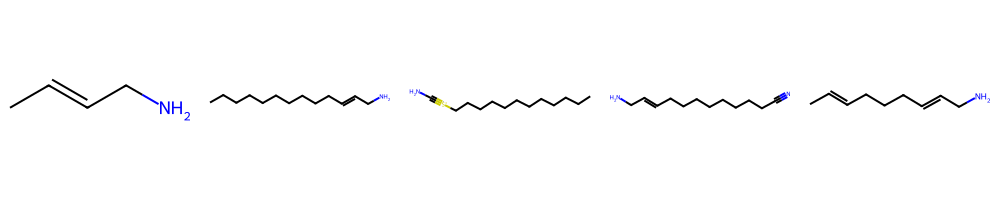

Generation 99


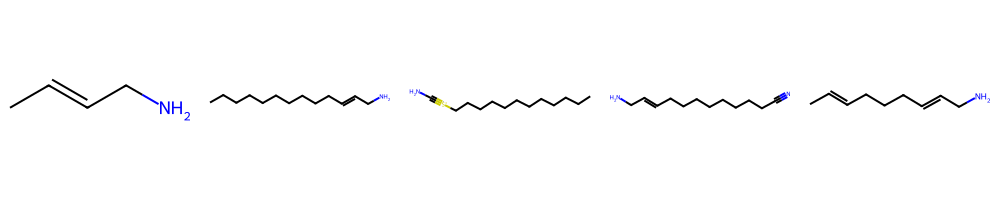

In [15]:
from src.view.viewer import population_grid
from IPython.display import display

for gen, p in enumerate(history):
    print(f"Generation {gen}")
    display(population_grid(p, n=6))

# Plot Mean Fitness Over Time

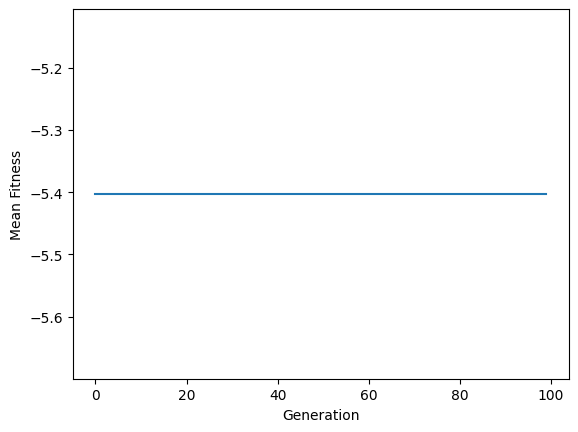

In [16]:
from src.view.plots import plot_fitness_over_time
plot_fitness_over_time(history)

# GIF?

In [6]:
import imageio
from rdkit.Chem.Draw import MolToImage
imgs = []

for p in history:
    best = min(p.molecules, key=lambda m: p.fitness[m])
    img = MolToImage(best.rdkit_mol, size=(300, 300))
    imgs.append(img)

imageio.mimsave("best_molecules.gif", imgs, duration=0.5)